In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential, load_model
from scipy.stats import pearsonr, spearmanr, ttest_1samp, ttest_ind_from_stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams['svg.fonttype'] = 'none'
rcParams['font.size']=15

Using Theano backend.
Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
b'/tmp/try_flags_zmnesck4.c:4:10: fatal error: cudnn.h: No such file or directory\n #include <cudnn.h>\n          ^~~~~~~~~\ncompilation terminated.\n'
ERROR (theano.gpuarray): Could not initialize pygpu, support disabled
Traceback (most recent call last):
  File "/home/eramamur/bin/miniconda3/envs/gpu_keras_theano/lib/python3.6/site-packages/theano/gpuarray/__init__.py", line 227, in <module>
    use(config.device)
  File "/home/eramamur/bin/miniconda3/envs/gpu_keras_theano/lib/python3.6/site-packages/theano/gpuarray/__init__.py", line 214, in use
    init_dev(device, preallocate=preallocate)
  File "/home/eramamur/bin/miniconda3/envs/gpu_keras_theano/lib/python3.6/site-packages/theano/gpuarray/__init__.py", line 140, in init_dev
    context.free_gmem / MB))
RuntimeError: Trying to preallocate 7713 MB of GPU memory while only 149 MB are available.


In [3]:
model_8 = load_model('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/tewhey_mpra_training/model_8.hdf5')

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '20910' (I am process '10964')


In [6]:
X_train = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/tewhey_mpra_training/mpra_train_X.npy')
Y_train = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/tewhey_mpra_training/mpra_train_Y.npy')
X_valid = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/tewhey_mpra_training/mpra_valid_X.npy')
Y_valid = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/tewhey_mpra_training/mpra_valid_Y.npy')

In [7]:
pred_train = model_8.predict(X_train)
pred_valid = model_8.predict(X_valid)

/home/eramamur/bin/miniconda3/envs/gpu_keras_theano/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


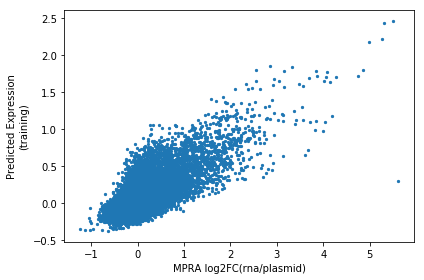

Training: (array([0.72769912]), array([0.]))
Training: SpearmanrResult(correlation=0.5963380311992603, pvalue=0.0)


In [8]:
plt.scatter(Y_train, pred_train, s=5)
plt.xlabel("MPRA log2FC(rna/plasmid)")
plt.ylabel("Predicted Expression\n(training)")

plt.show()

print("Training:",pearsonr(Y_train, pred_train))
print("Training:",spearmanr(Y_train, pred_train))

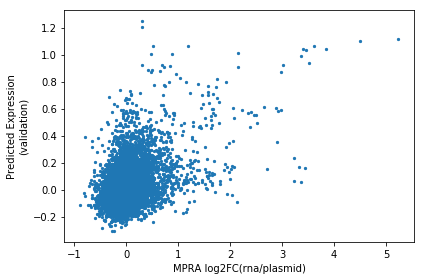

Validation: (array([0.43438876]), array([3.4184e-320]))
Validation: SpearmanrResult(correlation=0.3167505258116687, pvalue=6.178974600535545e-163)


In [9]:
plt.scatter(Y_valid, pred_valid, s=5)
plt.xlabel("MPRA log2FC(rna/plasmid)")
plt.ylabel("Predicted Expression\n(validation)")

plt.show()

print("Validation:",pearsonr(Y_valid, pred_valid))
print("Validation:",spearmanr(Y_valid, pred_valid))

In [10]:
tewhey_ref_sequences = np.load("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/tewhey_one_hot_encoded_ref_sequences.npy")
tewhey_alt_sequences = np.load("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/tewhey_one_hot_encoded_alt_sequences.npy")

In [11]:
ref_scores = model_8.predict(tewhey_ref_sequences)
alt_scores = model_8.predict(tewhey_alt_sequences)

In [12]:
tewhey_snp_info = pd.read_csv("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/tewhey_snps_data_extended_joined_to_1kg_mappings_with_1kb_snp_centered_sequences_with_gm_overlaps.txt",
                              sep="\t")

In [20]:
tewhey_snp_info["Ref.score"] = ref_scores
tewhey_snp_info["Alt.score"] = alt_scores
tewhey_snp_info["Predicted.skew"] = tewhey_snp_info["Alt.score"] - tewhey_snp_info["Ref.score"]

In [21]:
trainChrs = [17, 11, 19, 12, 5, 22, 9, 21]
validChrs = [3, 7]
testChrs = [1, 6, 10, 4, 2, 16, 20, 15, 8, 14, 18, 13]

In [22]:
train_tewhey_snp_info = tewhey_snp_info.loc[tewhey_snp_info["chr"].isin(trainChrs)]
valid_tewhey_snp_info = tewhey_snp_info.loc[tewhey_snp_info["chr"].isin(validChrs)]
test_tewhey_snp_info = tewhey_snp_info.loc[tewhey_snp_info["chr"].isin(testChrs)]

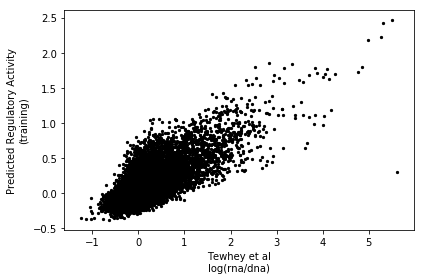

Reference Sequences: (0.7288451460391131, 0.0)
Reference Sequences: SpearmanrResult(correlation=0.598798214766105, pvalue=0.0)
Alternate Sequences: (0.7247500924320339, 0.0)
Alternate Sequences: SpearmanrResult(correlation=0.5916349201073237, pvalue=0.0)


In [23]:
plt.scatter(train_tewhey_snp_info["C.B.log2FC"], train_tewhey_snp_info["Alt.score"], c='k', s=5)
plt.scatter(train_tewhey_snp_info["C.A.log2FC"], train_tewhey_snp_info["Ref.score"], c='k', s=5)
plt.xlabel("Tewhey et al\nlog(rna/dna)")
plt.ylabel("Predicted Regulatory Activity\n(training)")

plt.show()
print("Reference Sequences:",pearsonr(np.nan_to_num(train_tewhey_snp_info["C.A.log2FC"]), train_tewhey_snp_info["Ref.score"]))
print("Reference Sequences:",spearmanr(np.nan_to_num(train_tewhey_snp_info["C.A.log2FC"]), train_tewhey_snp_info["Ref.score"]))
print("Alternate Sequences:",pearsonr(np.nan_to_num(train_tewhey_snp_info["C.B.log2FC"]), train_tewhey_snp_info["Alt.score"]))
print("Alternate Sequences:",spearmanr(np.nan_to_num(train_tewhey_snp_info["C.B.log2FC"]), train_tewhey_snp_info["Alt.score"]))

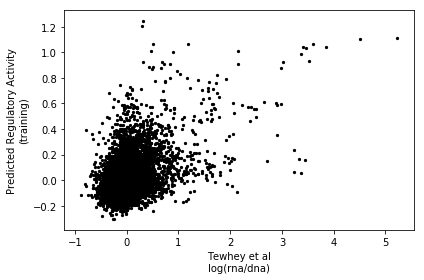

Reference Sequences: (0.4343762958737316, 1.6273185772237506e-161)
Reference Sequences: SpearmanrResult(correlation=0.3207728099718576, pvalue=8.110577081063744e-85)
Alternate Sequences: (0.43405516775171943, 2.9756953974783507e-161)
Alternate Sequences: SpearmanrResult(correlation=0.3108835834022377, pvalue=1.615551879788358e-79)


In [24]:
plt.scatter(valid_tewhey_snp_info["C.B.log2FC"], valid_tewhey_snp_info["Alt.score"], c='k', s=5)
plt.scatter(valid_tewhey_snp_info["C.A.log2FC"], valid_tewhey_snp_info["Ref.score"], c='k', s=5)
plt.xlabel("Tewhey et al\nlog(rna/dna)")
plt.ylabel("Predicted Regulatory Activity\n(training)")

plt.show()
print("Reference Sequences:",pearsonr(np.nan_to_num(valid_tewhey_snp_info["C.A.log2FC"]), valid_tewhey_snp_info["Ref.score"]))
print("Reference Sequences:",spearmanr(np.nan_to_num(valid_tewhey_snp_info["C.A.log2FC"]), valid_tewhey_snp_info["Ref.score"]))
print("Alternate Sequences:",pearsonr(np.nan_to_num(valid_tewhey_snp_info["C.B.log2FC"]), valid_tewhey_snp_info["Alt.score"]))
print("Alternate Sequences:",spearmanr(np.nan_to_num(valid_tewhey_snp_info["C.B.log2FC"]), valid_tewhey_snp_info["Alt.score"]))

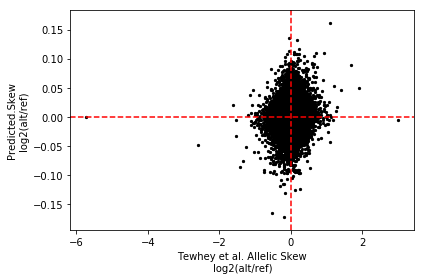

(0.10403212042132551, 2.284903096219376e-95)
SpearmanrResult(correlation=0.08683162083855006, pvalue=6.66335142068684e-67)


In [26]:
plt.scatter(train_tewhey_snp_info["LogSkew.Comb"],train_tewhey_snp_info["Predicted.skew"] , c = 'k', s=5)
plt.axhline(y=0, c='r', linestyle='--')
plt.axvline(x=0, c='r', linestyle='--')
plt.xlabel("Tewhey et al. Allelic Skew\nlog2(alt/ref)")
plt.ylabel("Predicted.Skew\nlog2(alt/ref)")
plt.show()
print(pearsonr(np.nan_to_num(tewhey_snp_info["LogSkew.Comb"]), tewhey_snp_info["Predicted.skew"]))
print(spearmanr(np.nan_to_num(tewhey_snp_info["LogSkew.Comb"]), tewhey_snp_info["Predicted.skew"]))

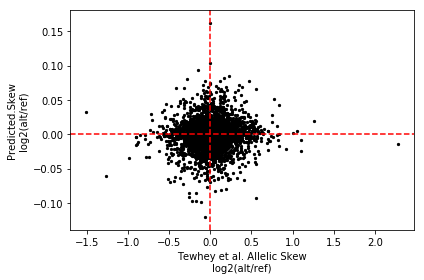

(0.06747045081345375, 6.322506203742464e-05)
SpearmanrResult(correlation=0.07524999863939237, pvalue=8.084050317614895e-06)


In [30]:
plt.scatter(valid_tewhey_snp_info["LogSkew.Comb"],valid_tewhey_snp_info["Predicted.skew"] , c = 'k', s=5)
plt.axhline(y=0, c='r', linestyle='--')
plt.axvline(x=0, c='r', linestyle='--')
plt.xlabel("Tewhey et al. Allelic Skew\nlog2(alt/ref)")
plt.ylabel("Predicted.Skew\nlog2(alt/ref)")
plt.show()
print(pearsonr(np.nan_to_num(valid_tewhey_snp_info["LogSkew.Comb"]), valid_tewhey_snp_info["Predicted.skew"]))
print(spearmanr(np.nan_to_num(valid_tewhey_snp_info["LogSkew.Comb"]), valid_tewhey_snp_info["Predicted.skew"]))

(0.11616272924003695, 5.738003917794289e-59)
SpearmanrResult(correlation=0.09495991052391221, pvalue=6.582649715213522e-40)


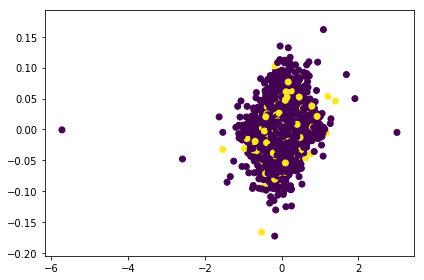

In [32]:
plt.scatter(train_tewhey_snp_info["LogSkew.Comb"], train_tewhey_snp_info["Predicted.skew"], c = train_tewhey_snp_info["Num.Overlaps.GM.peaks"]>0)
print(pearsonr(np.nan_to_num(train_tewhey_snp_info["LogSkew.Comb"]), train_tewhey_snp_info["Predicted.skew"]))
print(spearmanr(np.nan_to_num(train_tewhey_snp_info["LogSkew.Comb"]), train_tewhey_snp_info["Predicted.skew"]))

(0.06747045081345375, 6.322506203742464e-05)
SpearmanrResult(correlation=0.07524999863939237, pvalue=8.084050317614895e-06)


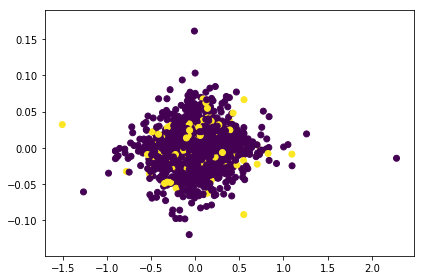

In [34]:
plt.scatter(valid_tewhey_snp_info["LogSkew.Comb"], valid_tewhey_snp_info["Predicted.skew"], c = valid_tewhey_snp_info["Num.Overlaps.GM.peaks"]>0)
print(pearsonr(np.nan_to_num(valid_tewhey_snp_info["LogSkew.Comb"]), valid_tewhey_snp_info["Predicted.skew"]))
print(spearmanr(np.nan_to_num(valid_tewhey_snp_info["LogSkew.Comb"]), valid_tewhey_snp_info["Predicted.skew"]))

In [37]:
train_tewhey_snp_info_sig = train_tewhey_snp_info[train_tewhey_snp_info["C.Skew.fdr"] > -np.log10(0.05)]
train_tewhey_snp_info_sig = train_tewhey_snp_info_sig[np.absolute(train_tewhey_snp_info_sig["LogSkew.Comb"])>0.5]
print(sum(np.sign(train_tewhey_snp_info_sig["LogSkew.Comb"]) == np.sign(train_tewhey_snp_info_sig["Alt.score"] - train_tewhey_snp_info_sig["Ref.score"])))
print(sum(np.sign(train_tewhey_snp_info_sig["LogSkew.Comb"]) != np.sign(train_tewhey_snp_info_sig["Alt.score"] - train_tewhey_snp_info_sig["Ref.score"])))

134
50


In [38]:
valid_tewhey_snp_info_sig = valid_tewhey_snp_info[valid_tewhey_snp_info["C.Skew.fdr"] > -np.log10(0.05)]
valid_tewhey_snp_info_sig = valid_tewhey_snp_info_sig[np.absolute(valid_tewhey_snp_info_sig["LogSkew.Comb"])>0.5]
print(sum(np.sign(valid_tewhey_snp_info_sig["LogSkew.Comb"]) == np.sign(valid_tewhey_snp_info_sig["Alt.score"] - valid_tewhey_snp_info_sig["Ref.score"])))
print(sum(np.sign(valid_tewhey_snp_info_sig["LogSkew.Comb"]) != np.sign(valid_tewhey_snp_info_sig["Alt.score"] - valid_tewhey_snp_info_sig["Ref.score"])))

20
11


In [39]:
test_tewhey_snp_info_sig = test_tewhey_snp_info[test_tewhey_snp_info["C.Skew.fdr"] > -np.log10(0.05)]
test_tewhey_snp_info_sig = test_tewhey_snp_info_sig[np.absolute(test_tewhey_snp_info_sig["LogSkew.Comb"])>0.5]
print(sum(np.sign(test_tewhey_snp_info_sig["LogSkew.Comb"]) == np.sign(test_tewhey_snp_info_sig["Alt.score"] - test_tewhey_snp_info_sig["Ref.score"])))
print(sum(np.sign(test_tewhey_snp_info_sig["LogSkew.Comb"]) != np.sign(test_tewhey_snp_info_sig["Alt.score"] - test_tewhey_snp_info_sig["Ref.score"])))

123
53


(0.4837797946914326, 3.48220012438423e-12)
SpearmanrResult(correlation=0.5064051935042669, pvalue=2.23687160786666e-13)


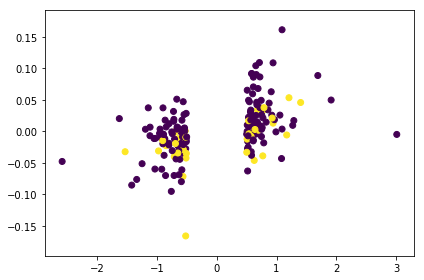

In [40]:
plt.scatter(train_tewhey_snp_info_sig["LogSkew.Comb"], train_tewhey_snp_info_sig["Predicted.skew"], c= train_tewhey_snp_info_sig["Num.Overlaps.GM.peaks"]>0)
print(pearsonr(np.nan_to_num(train_tewhey_snp_info_sig["LogSkew.Comb"]), train_tewhey_snp_info_sig["Predicted.skew"]))
print(spearmanr(np.nan_to_num(train_tewhey_snp_info_sig["LogSkew.Comb"]), train_tewhey_snp_info_sig["Predicted.skew"]))

(0.14647003725379593, 0.431719755951539)
SpearmanrResult(correlation=0.10322580645161292, pvalue=0.5805384684951491)


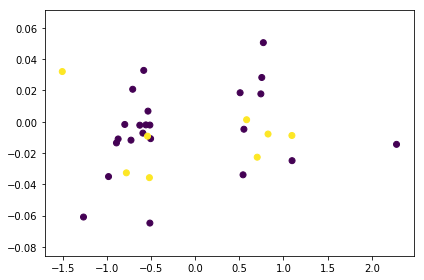

In [41]:
plt.scatter(valid_tewhey_snp_info_sig["LogSkew.Comb"], valid_tewhey_snp_info_sig["Predicted.skew"], c= valid_tewhey_snp_info_sig["Num.Overlaps.GM.peaks"]>0)
print(pearsonr(np.nan_to_num(valid_tewhey_snp_info_sig["LogSkew.Comb"]), valid_tewhey_snp_info_sig["Predicted.skew"]))
print(spearmanr(np.nan_to_num(valid_tewhey_snp_info_sig["LogSkew.Comb"]), valid_tewhey_snp_info_sig["Predicted.skew"]))

(0.46630374531793267, 6.917918891770517e-11)
SpearmanrResult(correlation=0.46965661457186886, pvalue=4.843845300906242e-11)


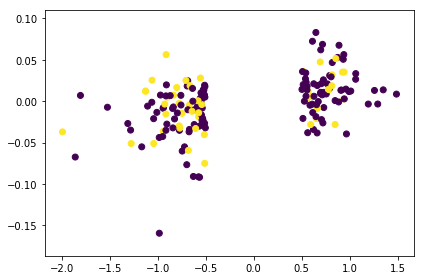

In [42]:
plt.scatter(test_tewhey_snp_info_sig["LogSkew.Comb"], test_tewhey_snp_info_sig["Predicted.skew"], c= test_tewhey_snp_info_sig["Num.Overlaps.GM.peaks"]>0)
print(pearsonr(np.nan_to_num(test_tewhey_snp_info_sig["LogSkew.Comb"]), test_tewhey_snp_info_sig["Predicted.skew"]))
print(spearmanr(np.nan_to_num(test_tewhey_snp_info_sig["LogSkew.Comb"]), test_tewhey_snp_info_sig["Predicted.skew"]))

In [ ]:
train_tewhey_snp_info_pos = train_tewhey_snp_info[train_tewhey_snp_info["C.Skew.fdr"] > -np.log10(0.05)]
train_tewhey_snp_info_pos = train_tewhey_snp_info_pos[train_tewhey_snp_info_pos["LogSkew.Comb"]>0.5]

train_tewhey_snp_info_neg = train_tewhey_snp_info[train_tewhey_snp_info["C.Skew.fdr"] > -np.log10(0.05)]
train_tewhey_snp_info_neg = train_tewhey_snp_info_neg[train_tewhey_snp_info_neg["LogSkew.Comb"]< -0.5]


train_tewhey_snp_info_neutral = train_tewhey_snp_info[train_tewhey_snp_info["C.Skew.fdr"] < -np.log10(0.05)]
train_tewhey_snp_info_neutral = train_tewhey_snp_info_neutral[np.absolute(train_tewhey_snp_info_neutral["LogSkew.Comb"]) < 0.5]

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

parts = ax.violinplot(dataset=[train_tewhey_snp_info_neg["Predicted.skew"].tolist(), train_tewhey_snp_info_neutral["Predicted.skew"].tolist(), train_tewhey_snp_info_pos["Predicted.skew"].tolist()],showmedians=False,showextrema=False)

parts['bodies'][0].set_facecolor('#440154FF')
parts['bodies'][0].set_edgecolor('black')
parts['bodies'][0].set_alpha(1)

parts['bodies'][1].set_facecolor('#238A8DFF')
parts['bodies'][1].set_edgecolor('black')
parts['bodies'][1].set_alpha(1)    


parts['bodies'][2].set_facecolor('#FDE725FF')
parts['bodies'][2].set_edgecolor('black')
parts['bodies'][2].set_alpha(1)   

plt.boxplot([train_tewhey_snp_info_neg["Predicted.skew"].tolist(), train_tewhey_snp_info_neutral["Predicted.skew"].tolist(), train_tewhey_snp_info_pos["Predicted.skew"].tolist()])
plt.axhline(y=0, c='k', linestyle='--')
plt.xticks(ticks = range(1,4), labels = ["Negative\n(Log.Skew<-0.5,\nq<0.05)", "Neutral\n(-0.5<Log.Skew<0.5,\nq>0.05)", "Positive\n(Log.Skew>05,\nq<0.05)"], horizontalalignment="center")
plt.ylabel("Predicted.Skew\nlog2(alt/ref)")
plt.title("Predicted skews by category")
plt.savefig("skew_prediction_categorized_tewhey.svg")
plt.ylim([-0.8,0.8])
print(ttest_1samp(train_tewhey_snp_info_neg["Predicted.skew"].tolist(),0))
print(ttest_1samp(train_tewhey_snp_info_neutral["Predicted.skew"].tolist(),0))
print(ttest_1samp(train_tewhey_snp_info_pos["Predicted.skew"].tolist(),0))
print(ttest_ind_from_stats(np.mean(train_tewhey_snp_info_neg["Predicted.skew"]),
                     np.std(train_tewhey_snp_info_neg["Predicted.skew"]),
                     len(train_tewhey_snp_info_neg["Predicted.skew"].tolist()),
                     np.mean(train_tewhey_snp_info_neutral["Predicted.skew"]),
                     np.std(train_tewhey_snp_info_neutral["Predicted.skew"]),
                     len(train_tewhey_snp_info_neutral["Predicted.skew"].tolist()),
                     equal_var=False))
print(ttest_ind_from_stats(np.mean(train_tewhey_snp_info_pos["Predicted.skew"]),
                     np.std(train_tewhey_snp_info_pos["Predicted.skew"]),
                     len(train_tewhey_snp_info_pos["Predicted.skew"].tolist()),
                     np.mean(train_tewhey_snp_info_neutral["Predicted.skew"]),
                     np.std(train_tewhey_snp_info_neutral["Predicted.skew"]),
                     len(train_tewhey_snp_info_neutral["Predicted.skew"].tolist()),
                     equal_var=False))

In [ ]:
train_tewhey_snp_info_overlapping_peaks = train_tewhey_snp_info[train_tewhey_snp_info["Num.Overlaps.GM.peaks"]>0]
train_tewhey_snp_info_pos = train_tewhey_snp_info_overlapping_peaks[train_tewhey_snp_info_overlapping_peaks["C.Skew.fdr"] > -np.log10(0.05)]
train_tewhey_snp_info_pos = train_tewhey_snp_info_pos[train_tewhey_snp_info_pos["LogSkew.Comb"]>0.5]

train_tewhey_snp_info_neg = train_tewhey_snp_info_overlapping_peaks[train_tewhey_snp_info_overlapping_peaks["C.Skew.fdr"] > -np.log10(0.05)]
train_tewhey_snp_info_neg = train_tewhey_snp_info_neg[tewhey_snp_info_neg["LogSkew.Comb"]< -0.5]


train_tewhey_snp_info_neutral = train_tewhey_snp_info_overlapping_peaks[train_tewhey_snp_info_overlapping_peaks["C.Skew.fdr"] < -np.log10(0.05)]
train_tewhey_snp_info_neutral = train_tewhey_snp_info_neutral[np.absolute(train_tewhey_snp_info_neutral["LogSkew.Comb"]) < 0.5]

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

parts = ax.violinplot(dataset=[train_tewhey_snp_info_neg["Predicted.skew"].tolist(), train_tewhey_snp_info_neutral["Predicted.skew"].tolist(), train_tewhey_snp_info_pos["Predicted.skew"].tolist()],showmedians=False,showextrema=False)

parts['bodies'][0].set_facecolor('#440154FF')
parts['bodies'][0].set_edgecolor('black')
parts['bodies'][0].set_alpha(1)

parts['bodies'][1].set_facecolor('#238A8DFF')
parts['bodies'][1].set_edgecolor('black')
parts['bodies'][1].set_alpha(1)    


parts['bodies'][2].set_facecolor('#FDE725FF')
parts['bodies'][2].set_edgecolor('black')
parts['bodies'][2].set_alpha(1)   

plt.boxplot([train_tewhey_snp_info_neg["Predicted.skew"].tolist(), train_tewhey_snp_info_neutral["Predicted.skew"].tolist(), train_tewhey_snp_info_pos["Predicted.skew"].tolist()])
plt.axhline(y=0, c='k', linestyle='--')
plt.xticks(ticks = range(1,4), labels = ["Negative\n(Log.Skew<-0.5,\nq<0.05)", "Neutral\n(-0.5<Log.Skew<0.5,\nq>0.05)", "Positive\n(Log.Skew>05,\nq<0.05)"], horizontalalignment="center")
plt.ylabel("Predicted.Skew\nlog2(alt/ref)")
plt.title("Predicted skews by category\n(Variants overlapping GM12878 DNase peaks)")
plt.savefig("skew_prediction_tewhey_categorized_peaks_only.svg")
plt.ylim([-0.8,0.8])
print(ttest_1samp(train_tewhey_snp_info_neg["Predicted.skew"].tolist(),0))
print(ttest_1samp(train_tewhey_snp_info_neutral["Predicted.skew"].tolist(),0))
print(ttest_1samp(train_tewhey_snp_info_pos["Predicted.skew"].tolist(),0))
print(ttest_ind_from_stats(np.mean(train_tewhey_snp_info_neg["Predicted.skew"]),
                     np.std(train_tewhey_snp_info_neg["Predicted.skew"]),
                     len(train_tewhey_snp_info_neg["Predicted.skew"].tolist()),
                     np.mean(train_tewhey_snp_info_neutral["Predicted.skew"]),
                     np.std(train_tewhey_snp_info_neutral["Predicted.skew"]),
                     len(train_tewhey_snp_info_neutral["Predicted.skew"].tolist()),
                     equal_var=False))
print(ttest_ind_from_stats(np.mean(train_tewhey_snp_info_pos["Predicted.skew"]),
                     np.std(train_tewhey_snp_info_pos["Predicted.skew"]),
                     len(train_tewhey_snp_info_pos["Predicted.skew"].tolist()),
                     np.mean(train_tewhey_snp_info_neutral["Predicted.skew"]),
                     np.std(train_tewhey_snp_info_neutral["Predicted.skew"]),
                     len(train_tewhey_snp_info_neutral["Predicted.skew"].tolist()),
                     equal_var=False))